In [1]:
import pandas as pd

In [2]:
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/projetos/enem_ap2023/enem_ap2023_tratado.csv",
                 sep=';', encoding="utf-8")

df.head()

,INSCRICAO,FAIXA_ETARIA,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,ESCOLA,ENSINO,MUNICIPIO_ESC,UF_ESC,DEPENDENCIA_ADM_ESC,LOCALIZACAO_ESC,SIT_FUNC_ESC,MUNICIPIO_PROVA,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,LINGUA,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,NOTA_FINAL
0,210059587847,19 anos,F,1,Parda,Brasileiro(a),Não respondeu,NaN,NaN,NaN,NaN,NaN,NaN,Macapá,522.7,544.6,528.5,432.2,Espanhol,160.0,180.0,180.0,160.0,200.0,880.0,581.60
1,210059388096,19 anos,M,1,Preta,Brasileiro(a),Não respondeu,NaN,NaN,NaN,NaN,NaN,NaN,Macapá,539.4,551.7,570.4,420.7,Espanhol,120.0,140.0,140.0,120.0,40.0,560.0,528.44
2,210059982331,26-30 anos,F,1,Parda,Brasileiro(a),Não respondeu,NaN,NaN,NaN,NaN,NaN,NaN,Santana,393.0,501.7,511.6,349.0,Espanhol,100.0,120.0,120.0,120.0,60.0,520.0,455.06
3,210058941508,21 anos,F,1,Preta,Brasileiro(a),Não respondeu,NaN,NaN,NaN,NaN,NaN,NaN,Macapá,484.9,504.8,503.4,445.7,Espanhol,140.0,180.0,160.0,160.0,120.0,760.0,539.76
4,210059855130,17 anos,M,1,Parda,Brasileiro(a),Pública,Regular,Santana,AP,Estadual,Urbana,Ativa,Santana,502.2,516.9,474.3,590.9,Espanhol,160.0,180.0,160.0,160.0,160.0,820.0,580.86


In [4]:
df.shape

(14793, 26)

O dataset possui um total de 14793 registros e 26 variáveis.

# CORRELAÇÃO
Alguns critérios são estabelecidos para descobrir se o teste de correlação a ser utilizado deve ser paramétrico ou não-paramétrico.

In [5]:
df_pub = df.copy()[df.ESCOLA == "Pública"].reset_index(drop=True)
df_priv = df.copy()[df.ESCOLA == "Privada"].reset_index(drop=True)

In [6]:
vars_notas = ["NOTA_CN", "NOTA_CH", "NOTA_LC", "NOTA_MT", "NOTA_REDACAO"]

vars_redac = ["NOTA_COMP1", "NOTA_COMP2", "NOTA_COMP3", "NOTA_COMP4",
              "NOTA_COMP5"]

In [7]:
notas_pub = df_pub[vars_notas]
notas_priv = df_priv[vars_notas]

redac_pub = df_pub[vars_redac]
redac_priv = df_priv[vars_redac]

## Diretrizes
**1) Escala de medida**  
Para escolher o tipo de correlação adequado, primeiro precisamos identificar a escala de medida das variáveis envolvidas.

In [8]:
notas_pub.head(1)

,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO
0,502.2,516.9,474.3,590.9,820.0


In [9]:
notas_pub.dtypes

NOTA_CN         float64
NOTA_CH         float64
NOTA_LC         float64
NOTA_MT         float64
NOTA_REDACAO    float64
dtype: object

In [10]:
redac_pub.head(1)

,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5
0,160.0,180.0,160.0,160.0,160.0


In [11]:
redac_pub.dtypes

NOTA_COMP1    float64
NOTA_COMP2    float64
NOTA_COMP3    float64
NOTA_COMP4    float64
NOTA_COMP5    float64
dtype: object

Ao se observarmos os resultados, percebemos que as amostras se encontram em escala intervalar, ou seja, se tratam de ***variáveis contínuas***. Nesse caso, é possível utilizar tanto a *Correlação de Pearson* como a de *Spearman*.

**2) Relação entre as variáveis**  
É essencial entender a natureza da relação entre as variáveis.  
**Notas Finais**

In [12]:
import seaborn as sns

In [13]:
def pair_plot(df, **kwargs):
    sns.pairplot(df, height=2, kind="reg",
                 plot_kws={"scatter_kws": {"alpha": 0.5},
                           "line_kws": {"color": "red"}}, **kwargs)

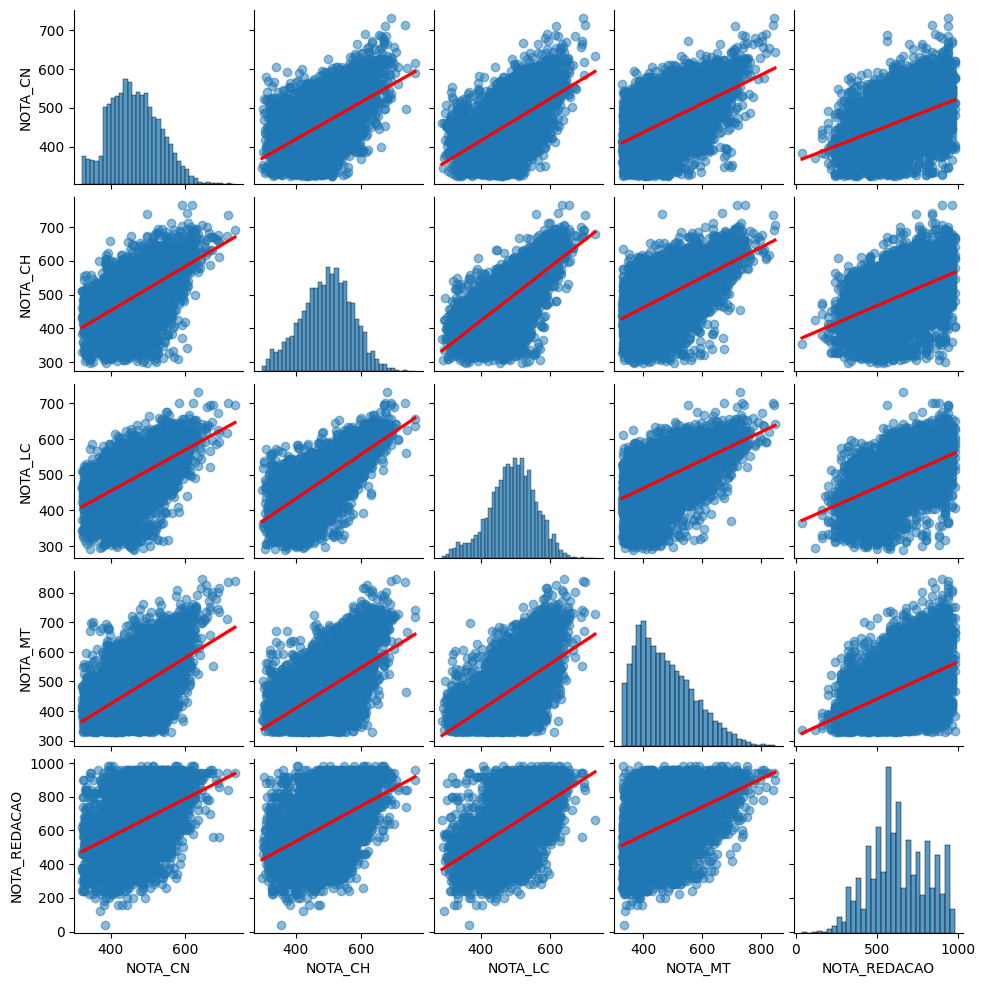

In [14]:
pair_plot(notas_pub)

A maioria variáveis demonstrou possuir alguma correlação linear, ainda que haja grande dispersão dos dados.

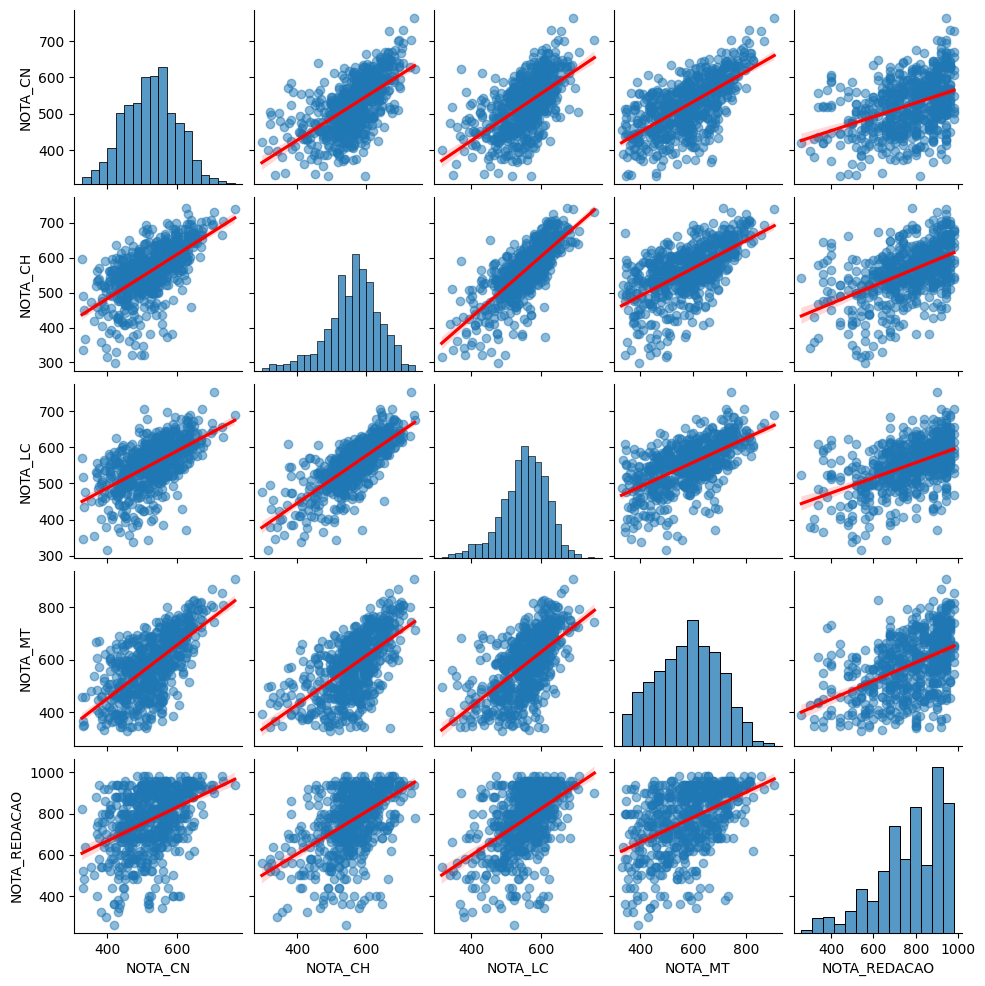

In [15]:
pair_plot(notas_priv)

A correlação linear positiva é ainda mais evidente na amostra de notas de escolas privadas.

**Notas de Redação**

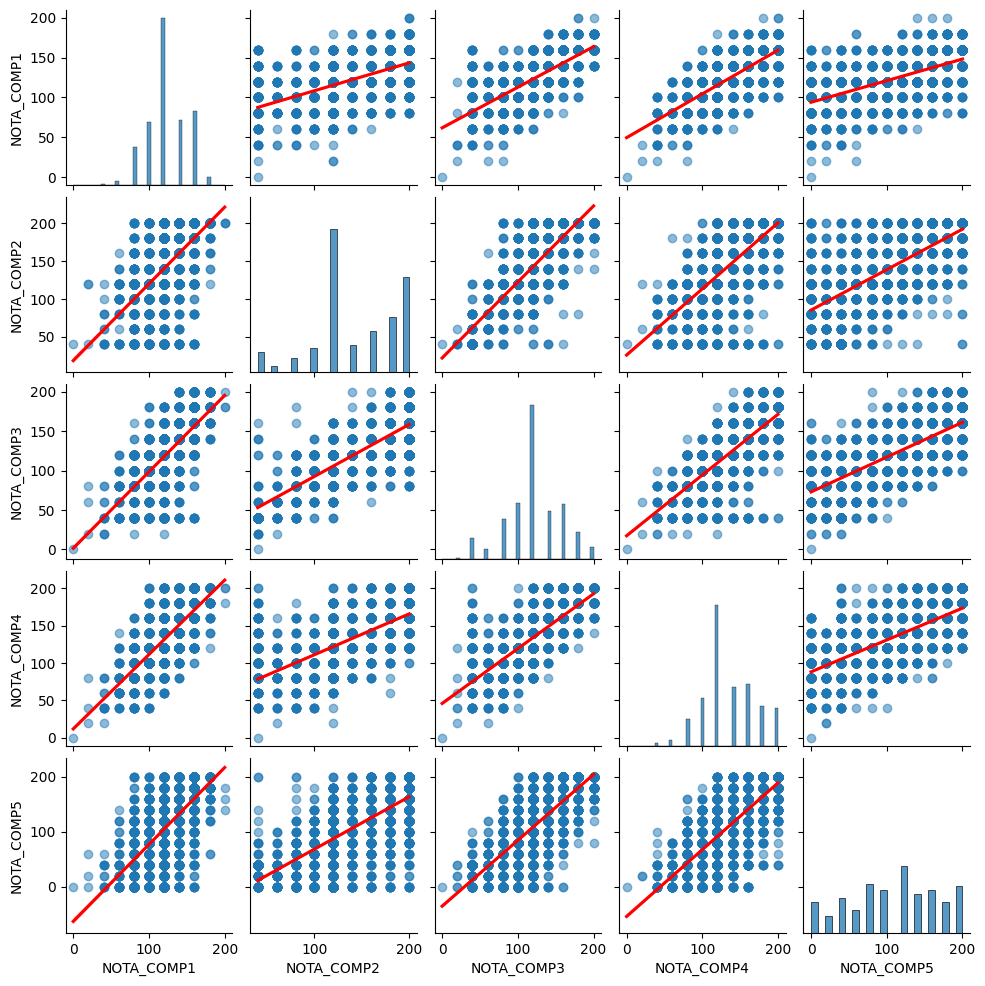

In [16]:
pair_plot(redac_pub)

Ao que tudo indica, a variação dos dados é baixa. Não obstante, é possível perceber correlação linear positiva entre algumas variáveis.

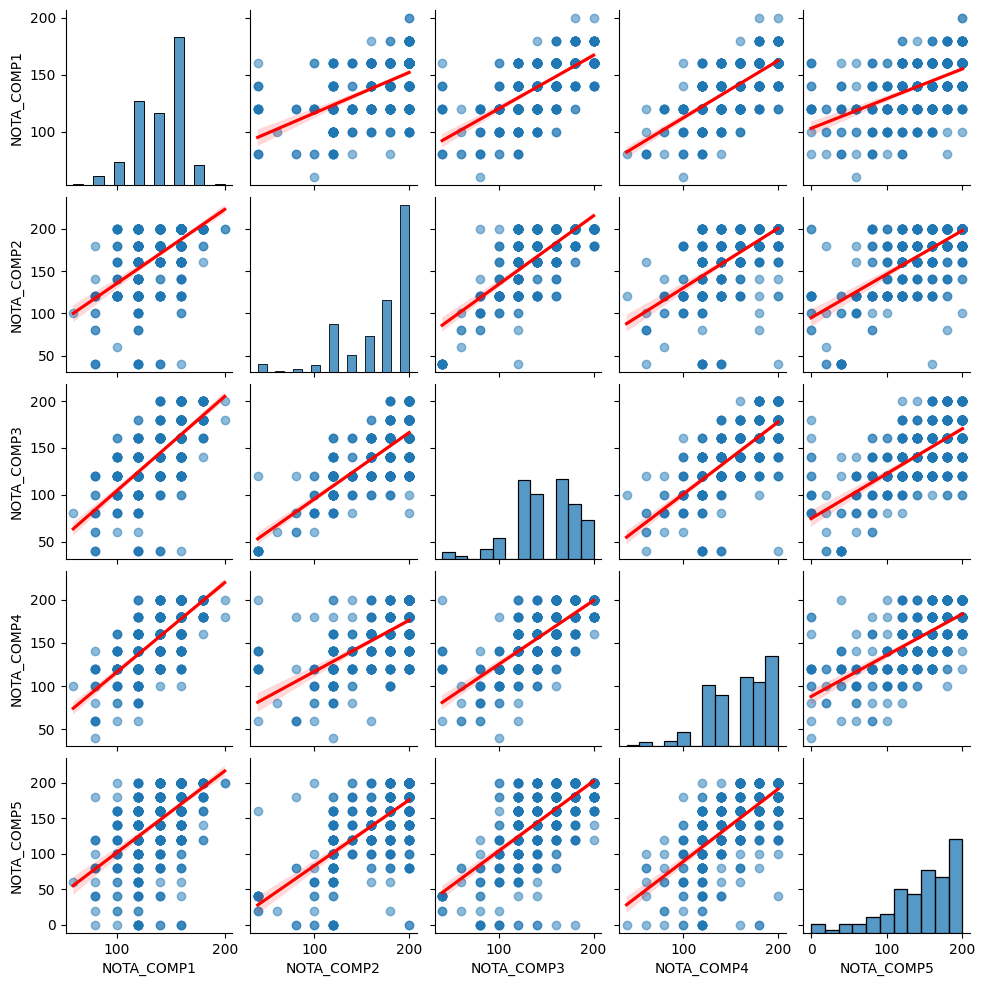

In [17]:
pair_plot(redac_priv)

O mesmo caso dos resultados de *redac_pub*.  
**CONCLUSÃO**  
A maioria das variáveis demonstraram possuir correlação, ainda que fraca para algumas.

**3) Normalidade**  
As distribuição das variáveis deve ser aproximadamente normal. Isso é especialmente importante para a significância estatística da correlação.

**Testes Gráficos**

In [18]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def qq_subplots(df):
    # Número de linhas
    if (len(df.columns) % 2) == 0:
        nrows = int(len(df.columns) / 2)
    else:
        nrows = int((len(df.columns) + 1) / 2)

    # Criação do gráfico
    fig, axes = plt.subplots(nrows, 2, figsize=(12, nrows*4))

    # Achatar os eixos para fácil iteração
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        stats.probplot(df[column], dist="norm", plot=axes[i])
        axes[i].set_title(f"QQ-plot de {column}")

    return plt.tight_layout()

Nota Final:

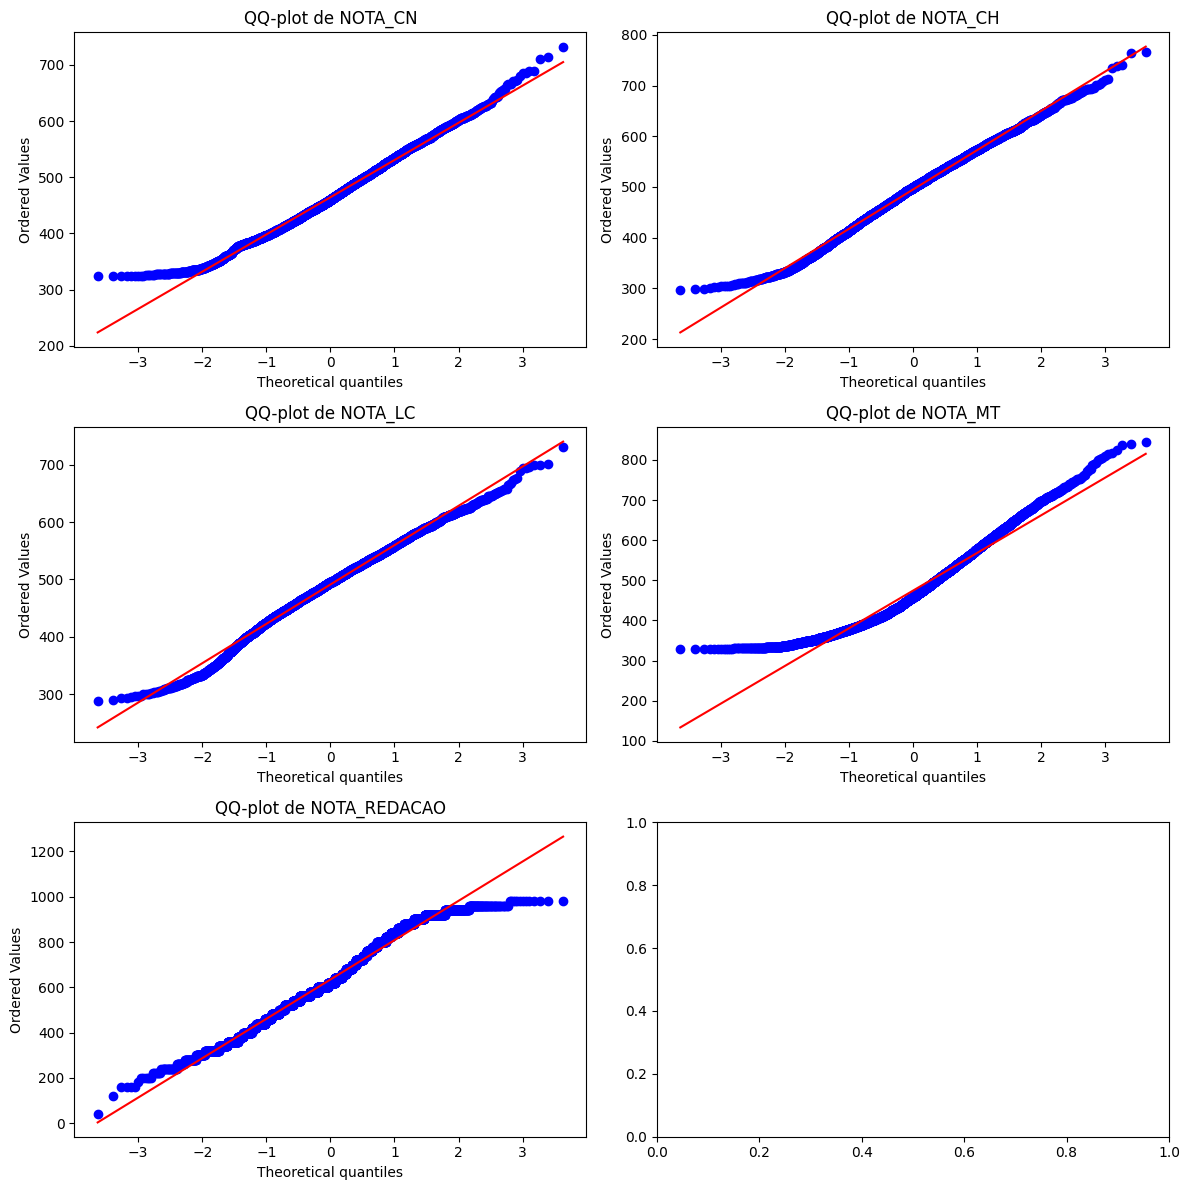

In [19]:
qq_subplots(notas_pub)

Em geral, as extremidades dos gráficos foram as partes que mais se desvirtuaram da linha que indica normalidade.

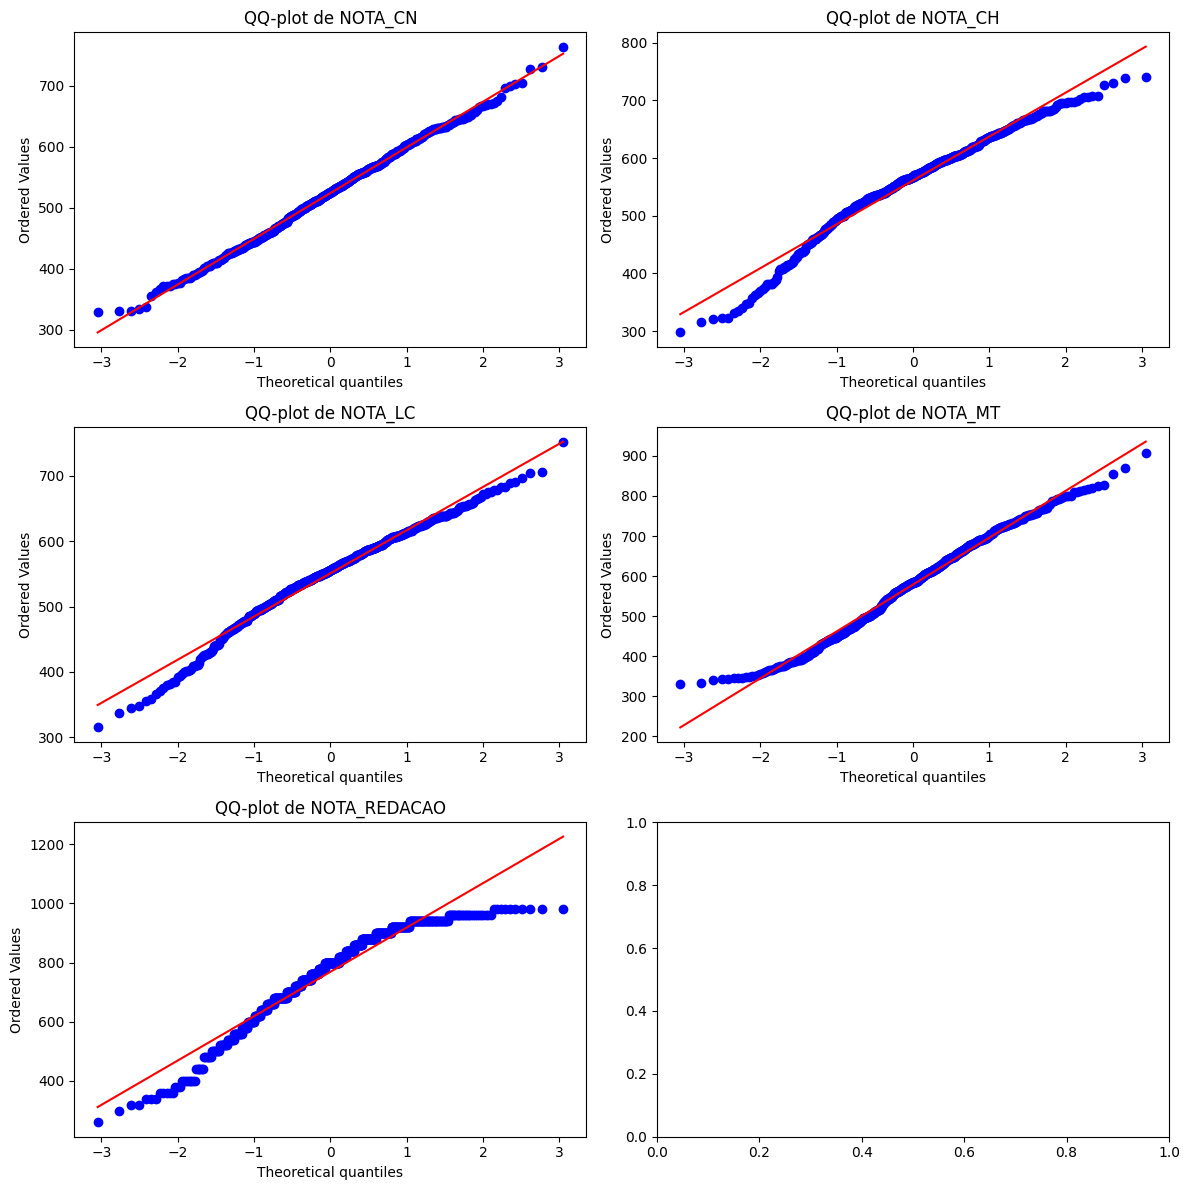

In [20]:
qq_subplots(notas_priv)

Novamente, as caudas das distribuições se mostraram pesadas.

Nota da Redação:

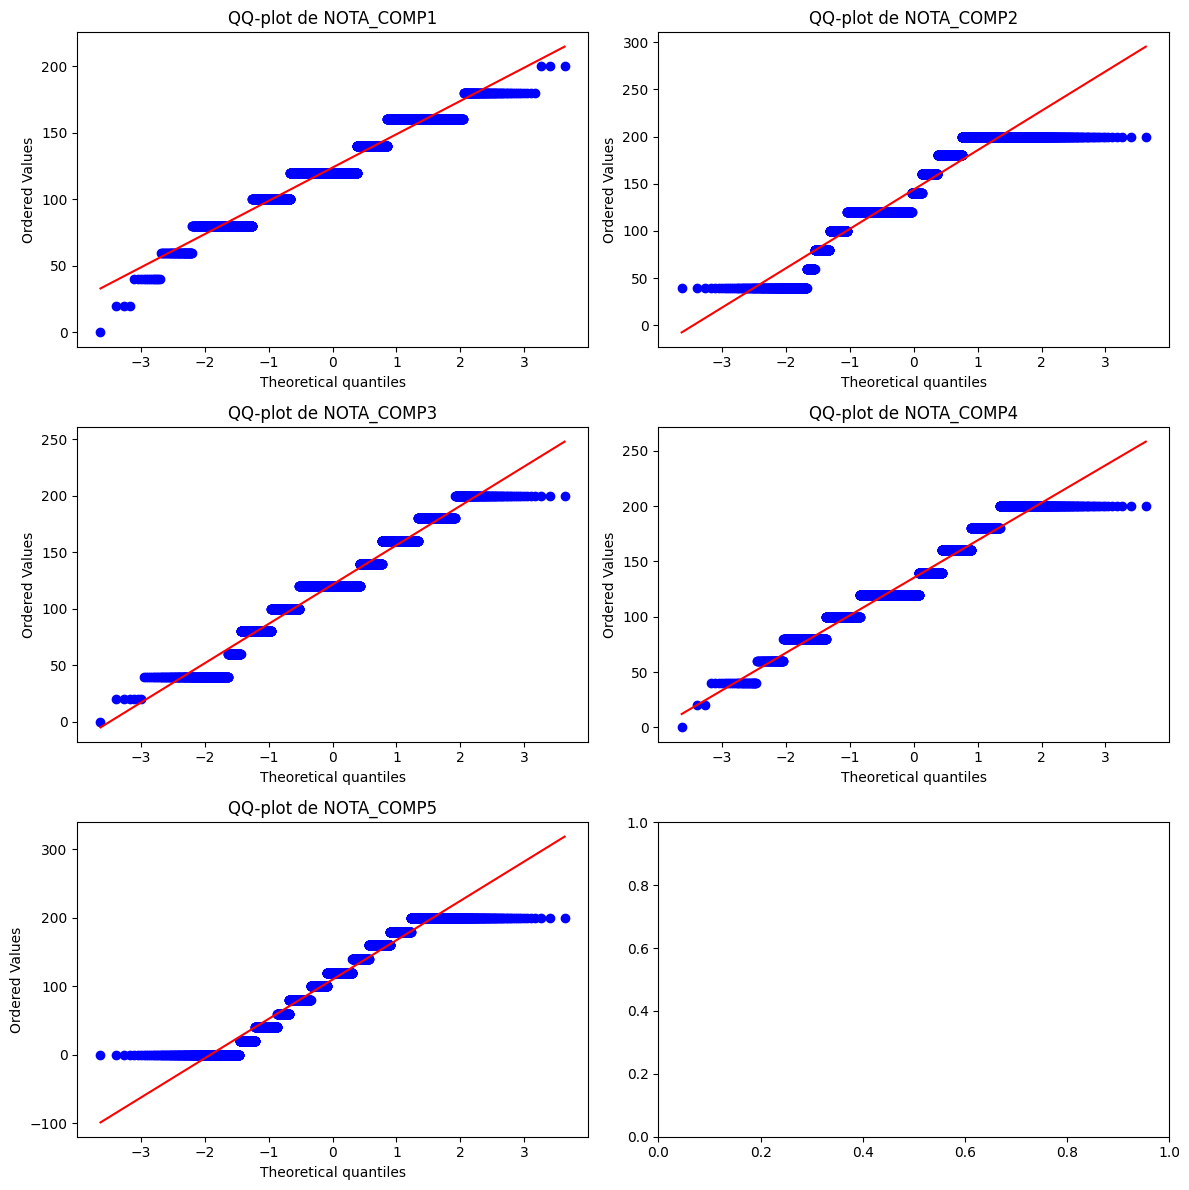

In [21]:
qq_subplots(redac_pub)

Os gráficos, em geral, demonstraram caudas pesadas, porém, para alguns, o centro da distribuição aparenta ser aproximadamente normal.

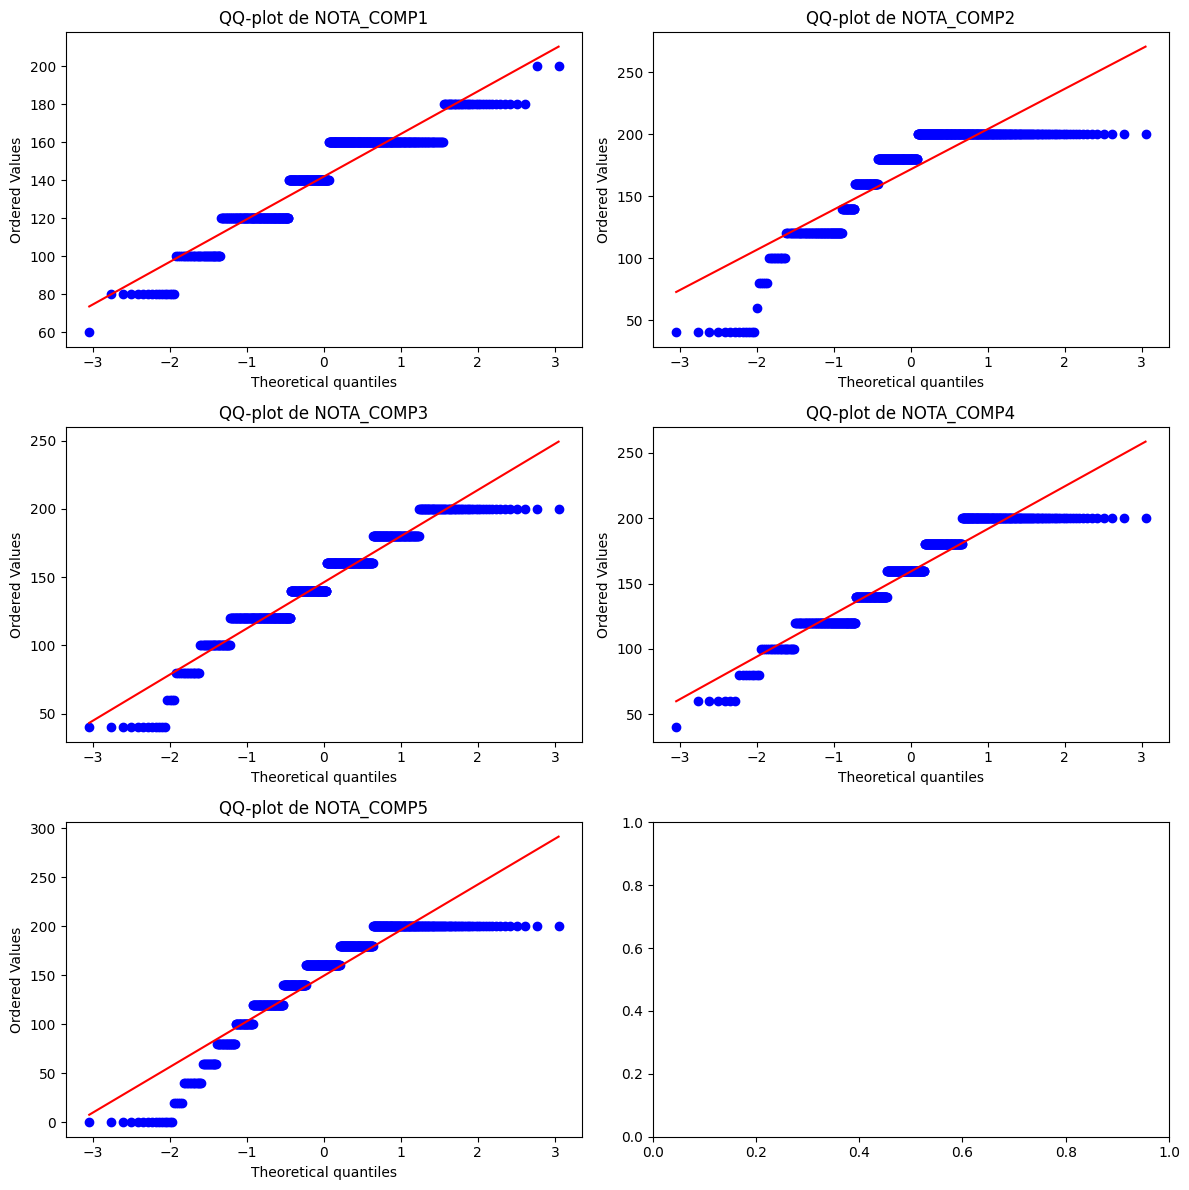

In [22]:
qq_subplots(redac_priv)

A mesma interpretação da análise anterior pode ser aplicada a essa.

**CONCLUSÃO**  
Levando em consderação o resultado dos testes gráficos, uma análise mais precisa com testes numéricos deve ser aplicada.

**Testes Numéricos**  
Nota final:

In [23]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors

def normalidade(df, cols=None):
    if isinstance(cols, str):
        cols = [cols]
    elif cols == None:
        cols = df.columns

    results = []

    # Vários testes numéricos de normalidade
    for col in cols:
        shapiro = stats.shapiro(df[col])[1]
        lillie = lilliefors(df[col], dist="norm")[1]
        jarque = stats.jarque_bera(df[col])[1]
        anderson = stats.anderson(df[col], dist="norm")[1][2] # alpha = 0.05

        results.append({"SHAPIRO": shapiro, "LILLIEFORS": lillie,
                        "JARQUE": jarque, "ANDERSON": anderson})

    # retorna o p-valor das variáveis
    return pd.DataFrame(results, index=cols)

In [24]:
normalidade(notas_pub)

,SHAPIRO,LILLIEFORS,JARQUE,ANDERSON
NOTA_CN,3.861566e-16,0.001,9.558204e-16,0.786
NOTA_CH,1.050304e-10,0.001,2.022164e-06,0.786
NOTA_LC,3.902865e-14,0.001,2.245035e-13,0.786
NOTA_MT,2.171911e-37,0.001,4.117774e-90,0.786
NOTA_REDACAO,7.409908e-25,0.001,4.245522e-23,0.786


Salvo o teste de Anderson-Darling, todos os outros testes apontaram para a não-normalidade dos dados. Dessa forma, concluímos que as variáveis não possuem distribuição normal.

In [25]:
normalidade(notas_priv)

,SHAPIRO,LILLIEFORS,JARQUE,ANDERSON
NOTA_CN,4.302706e-01,0.605070,3.905182e-01,0.782
NOTA_CH,6.051232e-09,0.001000,3.593951e-12,0.782
NOTA_LC,6.815743e-07,0.001000,9.238820e-09,0.782
NOTA_MT,7.865579e-05,0.081791,2.192713e-03,0.782
NOTA_REDACAO,3.063677e-16,0.001000,4.685298e-16,0.782


As variáveis *NOTA_CN* e *NOTA_MT* atestaram resultado misto à normalidade.

Nota de Redação:

In [26]:
normalidade(redac_pub)

,SHAPIRO,LILLIEFORS,JARQUE,ANDERSON
NOTA_COMP1,3.377129e-43,0.001,7.523419e-04,0.786
NOTA_COMP2,0.000000e+00,0.001,1.101543e-36,0.786
NOTA_COMP3,1.324882e-38,0.001,3.948325e-07,0.786
NOTA_COMP4,8.013592e-40,0.001,5.483181e-10,0.786
NOTA_COMP5,1.110906e-37,0.001,2.110651e-43,0.786


Com exceção dos teste de Anderson-Darling, todos os testes em suas respectivas variáveis não apontaram para distribuição aproximadamente normal.

In [27]:
normalidade(redac_priv)

,SHAPIRO,LILLIEFORS,JARQUE,ANDERSON
NOTA_COMP1,2.238010e-20,0.001,2.687615e-08,0.782
NOTA_COMP2,1.211961e-28,0.001,4.114517e-67,0.782
NOTA_COMP3,3.656634e-15,0.001,7.955159e-08,0.782
NOTA_COMP4,1.350818e-18,0.001,1.959936e-07,0.782
NOTA_COMP5,5.023316e-22,0.001,3.248786e-31,0.782


Todas as variáveis falharam na maioria dos testes.  

**CONCLUSÃO**  
Não se pôde atribuir com certeza normalidade para nenhuma amostra, exceto, possivelmente, para NOTA_CN e NOTA_MT de *notas priv*, assim, apenas essas podem seguir, com cautela, com o teste de Correlação de Pearson, as demais, devem prosseguir com a Correlação de Spearman.

**4) Independência**  
As observações devem ser independentes umas das outras e as variáveis remanescentes se enquadram a esta característica.

**5) Ausência de Outliers**  
A presença de outliers pode afetar diferentes tipos de correlação de maneiras distintas e a Correlação de Pearson requer a ausência de valores fora da curva.

In [28]:
df_out = pd.melt(notas_priv, value_vars=["NOTA_CN", "NOTA_MT"],
                 var_name="PROVA", value_name="NOTA")

In [29]:
import matplotlib.pyplot as plt

In [30]:
fig_size = (10, 5)

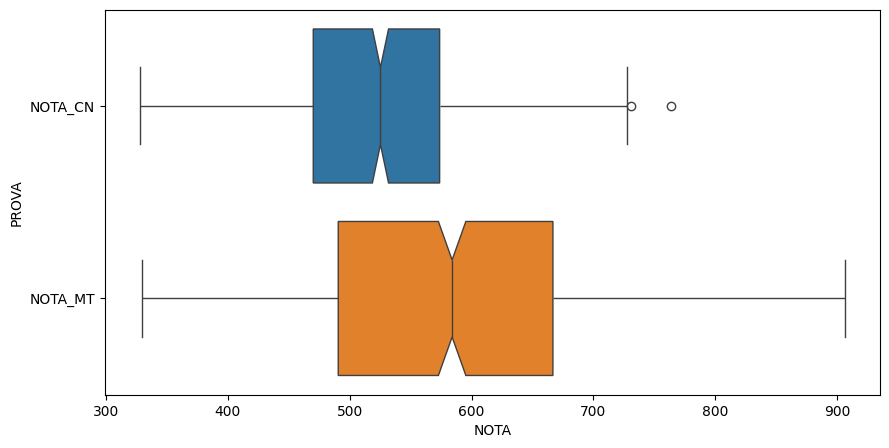

In [31]:
plt.figure(figsize=fig_size)

# Criação do boxplot com hue e legenda desativada
sns.boxplot(data=df_out, x="NOTA", y="PROVA", hue="PROVA", notch=True,
            dodge=False, legend=False);

Tendo em vista que NOTA_CN contém outliers, optamos por não utilizar a Correlação de Pearson nas análises posteriores.

**6) Tamanho da amostra**  
Embora a correlação possa ser calculada com amostras pequenas, tamanhos de amostra maiores tendem a fornecer estimativas mais estáveis e confiáveis.

In [32]:
len(notas_pub), len(notas_priv)

(4936, 603)

O tamanho da amostra das amostras é satisfatório.

## Rho de Spearman
Medida estatística que avalia a força e a direção de uma relação monotônica entre duas variáveis.

**1\. Força e Direção**  
A força da correlação indica quão fortemente as duas variáveis estão relacionadas entre si. Já a direção da correlação revela se a relação entre as variáveis é ascendente ou descendente.

Ao final dos teste de força e direção, as variáveis com a correlação "mais forte" serão escolhidas para avaliação da significância correlacional.

| COEFICIENTE | GRAU |
- | -
| r = ±1 | Perfeita |
| ±0,8 ≤ r < ±1 | Muito forte |
| ±0,6 ≤ r <± 8 | Forte |
| ±0,4 ≤ r < ±0,6 | Moderada |
| ±2 ≤ r < ±0,4 | Fraca |
| 0 < r < ±0,2 | Muito fraca |
| r = 0 | Sem correlação |

<br></br>
**Nota Final**  
Será verificado a força e a direção da correlação entre as variáveis que compõe a nota final dos candidatos do ENEM 2023.

In [33]:
def corr_spearman(df):
    heatmap = sns.heatmap(df.corr(method="spearman"), annot=True, fmt=".2f",
                          cmap="coolwarm", cbar=True, linewidths=1,
                          linecolor='lightgrey')

    return plt.show()

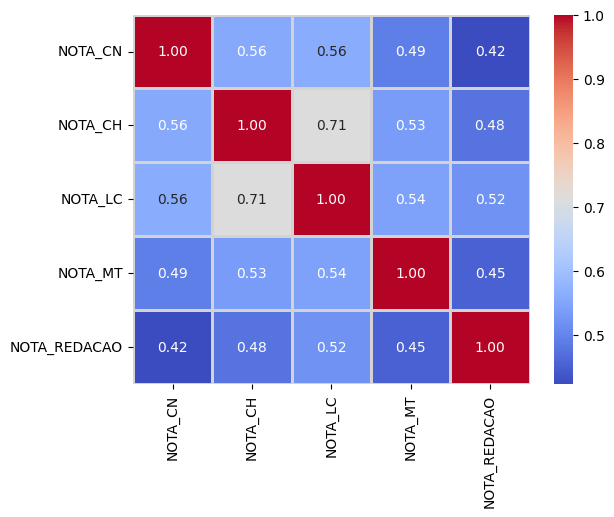

In [34]:
corr_spearman(notas_pub)

A correlação positiva observada entre NOTA_LC e NOTA_CH foi a maior e pode ser considerada como forte.

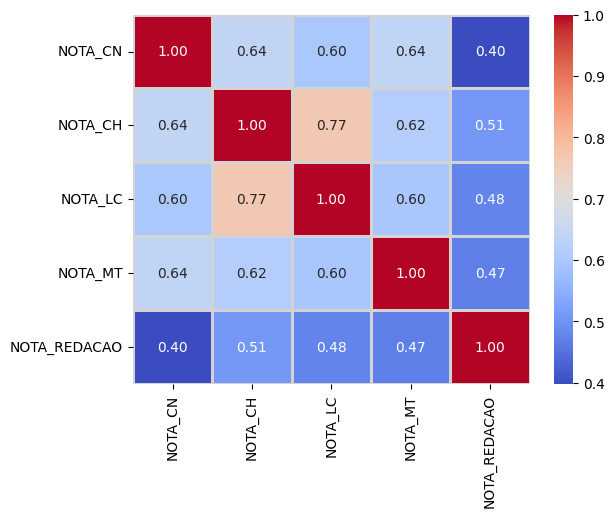

In [35]:
corr_spearman(notas_priv)

NOTA_CH e NOTA_LC revelaram o maior grau de correlação dentre todas as variáveis.

**Notas da Redação**  
Duas populações foram separadas com as notas das competências que compõe a nota de redação do ENEM.

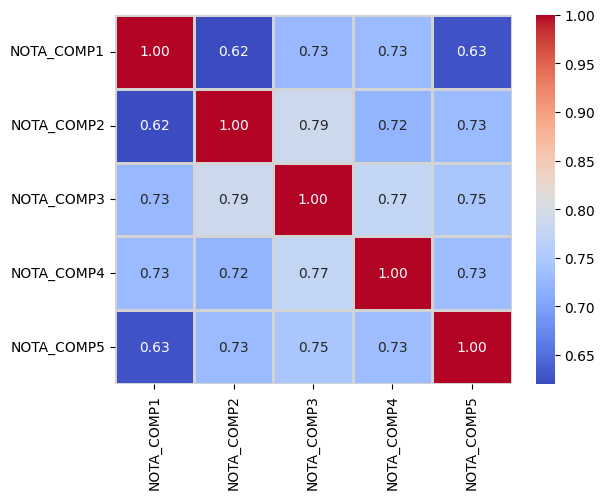

In [36]:
corr_spearman(redac_pub)

O maior coeficiente de correlação observado foi entre NOTA_COMP3 e NOTA_COMP2, que beirou a correlação "muito forte".

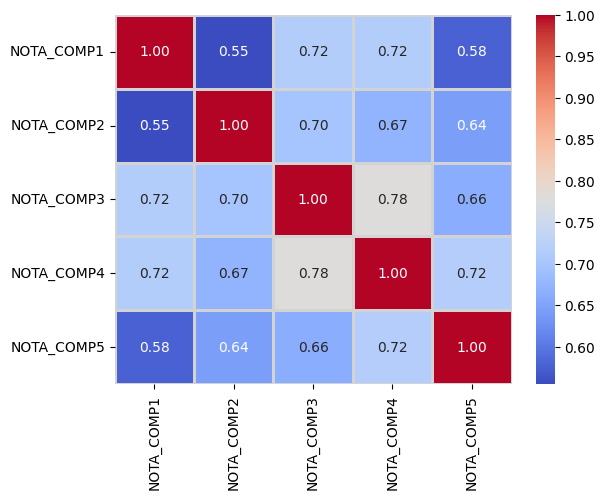

In [37]:
corr_spearman(redac_priv)

As variáveis NOTA_COMP4 e NOTA_COMP3 demonstraram estar correlacionadas de maneira mais aproximada.

**CONCLUSÃO**  
As variáveis que demonstraram maior força de correlação entre si foram NOTA_COMP2 e NOTA_COMP3, do dataset redac_pub. Com isso, elas serão avaliadas para verificar se a correlação observada é devida ao acaso.

**2\. Significância Estatística**  
Testes estatísticos devem ser utilizados para verificar se a correlação observada é estatisticamente significativa.

Hipóteses:
- **H<sub>0</sub>:** Não há correlação significativa entre as variáveis;
- **H<sub>1</sub>:** Há correlação significativa entre as variáveis.

Critérios:
- **Nível de significância (α):** 0,05.

In [38]:
stats.spearmanr(redac_pub.NOTA_COMP3, redac_pub.NOTA_COMP2)

SignificanceResult(statistic=0.7871415741577044, pvalue=0.0)

O p-valor menor que o nível de significância escolhido indica forte significância estatística e aponta para a aceitação da hipótese alternativa, de que há correlação significativa entre NOTA_COMP2 e NOTA_COMP3.

**CONCLUSÃO**  
O resultado do coeficiente de spearman (0.79) confirma a correlação linear positiva forte entre NOTA_COMP2 e NOTA_COMP3 e o p-valor, significância estatística, que, em termos práticos, conclui que a probabilidade da relação entre as variáveis observadas ser devida ao acaso é praticamente nula. Isso sugere interdependência significativa entre as competências.  
Ainda assim, é importante ressaltar que correlação não implica causalidade, assim, mesmo que seja forte e significativa, não se pode concluir que uma variável causa a outra sem análise adicional.

# Regressão Linear Simples
Método estatístico que busca estabelecer uma relação linear entre uma variável independente e outra dependente.

---

<p align="center" ><strong>ANÁLISE DA RELAÇÃO ENTRE AS COMPETÊNCIAS 2 E 3 DA REDAÇÃO DO ENEM 2023</strong></p>

**INTRODUÇÃO**  
Após analisar a correlação entre as duas competências da redação do ENEM 2023, prosseguiremos com uma análise de regressão linear simples. Este estudo busca explorar a relação linear entre essas variáveis, modelando o desempenho na nota da competência 2 (NOTA_COMP2), que avalia a capacidade de "Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa", em função do desempenho da nota da competência 3 (NOTA_COMP3), que analisa a capacidade de "Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista".

**OBJETIVO**  
Será realizado um modelo de regressão linear simples onde a variável dependente (Y) será a NOTA_COMP2 e a variável independente (X) será a NOTA_COMP3. O modelo buscará prever os valores de NOTA_COMP2 com base nos valores de NOTA_COMP3 e avaliar a força e direção da relação entre essas duas competências.

**JUSTIFICATIVA**  
Compreender a relação entre essas competências é fundamental para identificar como diferentes habilidades de escrita e argumentação podem influenciar a capacidade de desenvolvimento de um tema proposto na redação do ENEM. Este conhecimento pode ser útil para educadores e alunos ao direcionar esforços pedagógicos para melhorar o desempenho na redação do exame.

**HIPÓTESE**  
Com base nos resultados da análise de correlação, a hipótese principal deste estudo é que há uma relação linear positiva significativa entre NOTA_COMP3 e NOTA_COMP2. Especificamente, espera-se que alunos com notas mais altas na Competência 3 também apresentem notas mais altas na Competência 2, refletindo uma relação entre a habilidade de selecionar e organizar informações e a capacidade de desenvolver o tema proposto.

**METODOLOGIA**  
Para explorar a relação linear entre NOTA_COMP2 e NOTA_COMP2, utilizamos uma abordagem de regressão linear simples, composta dos passos a seguir.

## Linearidade
A relação entre as variáveis deve ser linear.

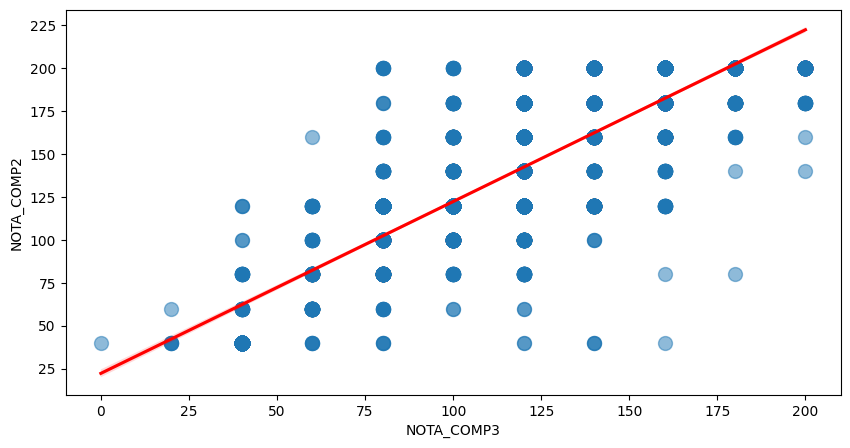

In [39]:
plt.figure(figsize=fig_size)

# Criar o gráfico de dispersão com linha de tendência usando seaborn
sns.regplot(data=redac_pub, x="NOTA_COMP3", y="NOTA_COMP2",
            scatter_kws={'s': 100, "alpha": 0.5}, line_kws={"color": "red"});

Observando o gráfico, é possível identificar uma relação de linearidade entre as variáveis.

## Ajuste do modelo

**1\. Criação do modelo**  
A linha que representa a relação entre as variáveis em um modelo de regressão linear simples é formulada pela seguinte equação:

$$y = α + β.x$$

A função ols (Ordinary Least Squares) do módulo *statsmodels.formula.api* é utilizada para realizar a regressão linear simples.

In [40]:
import statsmodels.formula.api as smf

In [41]:
# criação e ajuste do modelo
modelo = smf.ols("NOTA_COMP2 ~ NOTA_COMP3", data=redac_pub).fit()

**2\. Estimativa os parâmetros**  
Processo de determinar os valores dos coeficientes que definem a equação da linha de melhor ajuste aos dados.  
Para estimar os parâmetros *α* e *β*, utilizamos a soma dos quadrados dos resíduos.

**Coeficientes da Regressão**  
Indicam como as notas da competência 3 afetam as notas da 2.  
Coeficiente linear (β):  
Representa o valor de Y quando X é igual a zero.

In [42]:
modelo.params["Intercept"]

22.228062714898254

O Intercept indica que, teoricamente, quando NOTA_COMP3 é zero, a NOTA_COMP2 seria 22.23.

Coeficiente angular (α):  
Representa a taxa de variação de Y em relação a X.

In [43]:
modelo.params["NOTA_COMP3"]

1.0012043259400147

O Slope sugerem que para cada unidade de aumento em NOTA_COMP3, NOTA_COMP2 aumenta em aproximadamente 1.002 pontos, o que indica uma aproximação significativa entre as notas.

## Avaliação do modelo
Não basta simplesmente fazer a regressão, é necessário saber se o modelo é eficiente. Isso pode ser medido através dos seguintes itens.  
**1) Valores-p**  
Indicam a significância estatística dos coeficientes do modelo, ou seja, se podemos considerar que o efeito observado nas variáveis não é devido ao acaso.  
Critérios:
- **Nível de significância:** 0.05;

Hipóteses:
- **H<sub>0</sub>:** O coeficiente é zero;
- **H<sub>1</sub>:** O coeficiente é diferente de zero.

Coeficiente Linear (β<sub>0</sub>):

In [44]:
modelo.pvalues.Intercept

5.0859868740086304e-64

Com o resultado menor que alpha, rejeitamos a hipótese nula. O valor p-valor de ≈ 0 indica que existe forte evidência estatística de que a relação entre a nota da competência 2 e 3 não é por acaso, ou seja, concluimos com grande confiança que a competência 2 de fato influencia a nota da 3.

Coeficiente Angular (β<sub>1</sub>):

In [45]:
modelo.pvalues.NOTA_COMP3

0.0

Com o p-valor 0 (< nível de significância), rejeitamos a hipótese nula. Isso sugere evidência estatística forte de que o coeficiente de *NOTA_COMP3* é diferente de zero, indicando uma relação significativa entre as variáveis.

**2) Resíduos**  
Diferenças entre os valores observados da variável dependente e os valores previstos pelo modelo. Em outras palavras, eles representam o quanto o modelo está errando em suas previsões.  
**INDEPENDÊNCIA**  
Os resíduos exibirem algum padrão sugere que o modelo pode não capturar corretamente a relação entre as variáveis dependente e independente.

In [46]:
residuos = modelo.resid

In [47]:
tam_resids = len(residuos)

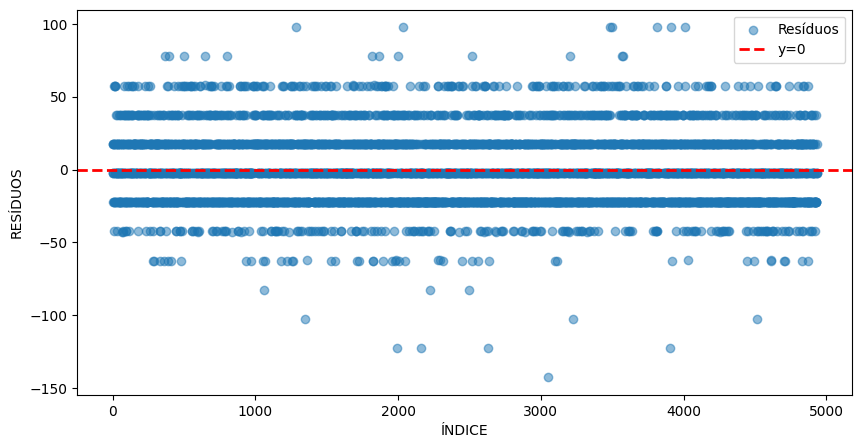

In [48]:
plt.figure(figsize=fig_size)

# Gráfico de dispersão (resíduos ao longo do tempo)
plt.scatter(range(tam_resids), residuos, label="Resíduos", alpha=0.5)

# Adicionar linha horizontal em y=0
plt.axhline(y=0, color="red", linestyle="--", linewidth=2, label="y=0")

# Configurações do layout
plt.xlabel("ÍNDICE")
plt.ylabel("RESÍDUOS")
plt.legend();

Análise:
- Os resíduos parecem estar aleatoriamente dispersos em torno da linha vermelha (representação do valor zero);
- Não há um padrão claro, como um formato parabólico ou tendências crescentes/decrescentes, o que sugere que resíduos independentes;
- A distribuição em torno da linha zero parece razoavelmente uniforme, sem clusters significativos ou padrões visíveis.

Baseado na inspeção visual do gráfico, os resíduos aparentam ser independentes, porém, ainda há outros maneiras de verificar independência dos resíduos, como a Função de Autocorrelação.

**Função de Autocorrelação (ACF)**

In [49]:
from statsmodels.graphics.tsaplots import plot_acf

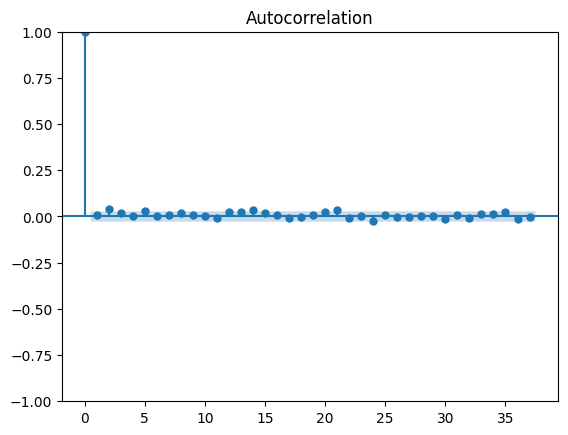

In [50]:
plot_acf(residuos);

As barras dos lags 1 e seguintes estão dentro dos limites de significância (intervalo de confiança). Isso ausência de autocorrelação (resíduos independentes) significativa entre os resíduos para os lags considerados. Essa ausência sugere que o modelo de regressão ajustado é apropriado e que os resíduos se comportam como um ruído branco (aleatoriamente distribuídos).  
Os testes visuais fornecem boa base para entender verificar a independência dos resíduos, contudo, para uma análise mais rigorosa, é interessante realizar o teste de Durbin-Watson para confirmar se há independência entre os resíduos.

**Teste de Durbin-Watson**  
Detecta a presença de autocorrelação nos resíduos de uma regressão.

In [51]:
from statsmodels.stats.stattools import durbin_watson

In [52]:
durbin_watson(residuos)

1.9885097489853916

O resultado próximo a 2 indica independência dos resíduos.

**NORMALIDADE**  
Os resíduos devem seguir uma distribuição normal.  
Critério:
- **Nível de significância:** 0.05.

**Teste gráficos**

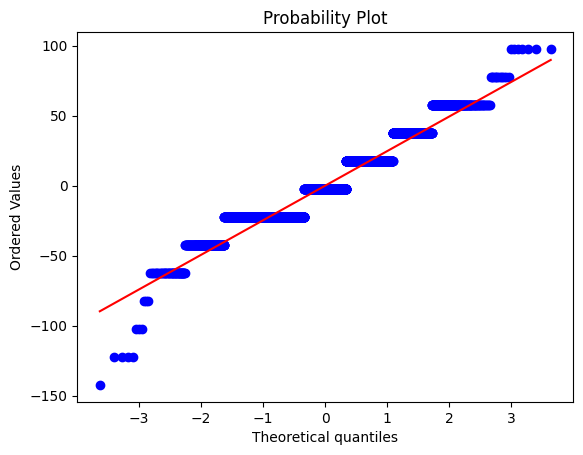

In [53]:
stats.probplot(residuos, dist="norm", plot=plt);

O gráfico qq revelou desvio da normalidade nas caudas da distribuição, porém, o restante demonstrou ser aproximadamente normal.

**Testes numéricos**

In [54]:
normalidade(pd.DataFrame(residuos, columns=["RESIDUO"]))

,SHAPIRO,LILLIEFORS,JARQUE,ANDERSON
RESIDUO,3.363116e-44,0.001,2.883777e-29,0.786


A maioria dos resultados teve p-valor menor que o nível de significância escolhido, portanto, é possível concluir que a normalidade foi violada. A não-normalidade dos resíduos pode impactar a validade de inferências estatísticas, como os intervalos de confiança e testes de hipóteses, mas como os p-valores dos coeficientes são extremamente baixos, essa discrepância pode não ter um impacto significativo nos resultados. Assim, seguiremos com o modelo, continuando com a avaliação dos pressupostos.

**HOMOSCEDASTICIDADE**  
Refere-se à situação em que a variância, variabilidade dos erros de um modelo estatístico é constante em todos os valores da (s) variável (eis) independente (s).

**Teste gráfico**

In [55]:
vals_ajusts = modelo.fittedvalues

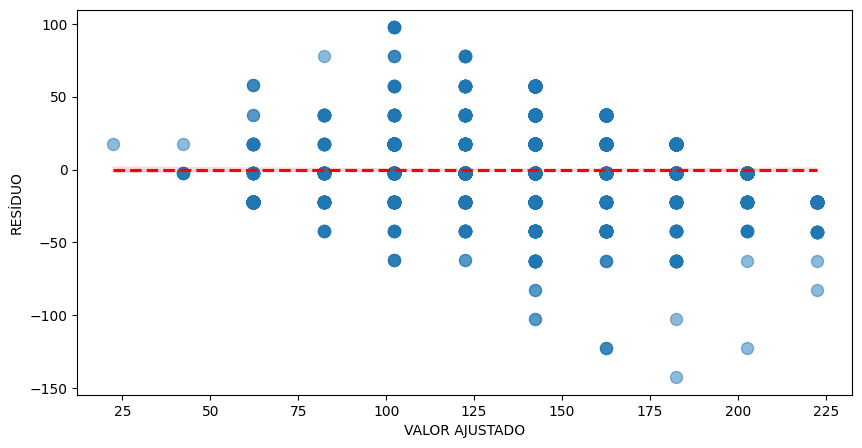

In [56]:
plt.figure(figsize=fig_size)

# Criar o gráfico de dispersão com linha de tendência usando seaborn
sns.regplot(x=vals_ajusts, y=residuos, scatter_kws={'s': 75, "alpha": 0.5},
            line_kws={"color": "red", "linestyle": "--"})

# Configurações do layout
plt.xlabel("VALOR AJUSTADO")
plt.ylabel("RESÍDUO");

Podemos observar que os pontos azuis estão distribuídos aleatoriamente ao redor da linha vermelha. Isso indica que os resíduos são homocedásticos, o que sugere que os pressupostos do modelo de regressão linear estão sendo satisfeitos.

**Testes numéricos**  
Critérios:
- **Nível de significância:** 0.05.

Hipóteses:
- **H<sub>0</sub>:** Os resíduos são homocedásticos;
- **H<sub>1</sub>:** Os resíduos são heterocedásticos.

In [57]:
from statsmodels.stats.api import het_breuschpagan, het_white

In [58]:
stat_bp, p_bp, stat_f, p_f  = het_breuschpagan(residuos, modelo.model.exog)

p_bp, p_f

(0.2590708454718533, 0.25916076785653086)

Ambos os valores-p baixos apontam para a aceitação da hipótese nula de homoscedasticidade, sugerindo que a variância dos resíduos é constante. Isso é desejável, por tornar a interpretação dos resultados da regressão mais confiáveis e melhorar a precisão das estimativas dos parâmetros.

In [59]:
stat_wt, p_wt, f_stat, f_p = het_white(residuos, modelo.model.exog)

p_wt, f_p

(4.80676946748846e-17, 3.6842978698329485e-17)

Com base nos valores-p fornecidos, tanto a estatística LM quanto a estatística F indicam significância estatística (valores-p baixos), o que sugere evidência contra a homocedasticidade dos resíduos. Isso significa que é improvável que os resíduos tenham variância constante em relação às variáveis independentes do modelo.

**3) Coeficiente de Determinação**  
**R-quadrado**  
Medida estatística que quantifica o quanto a linha de regressão se ajusta aos dados.

In [60]:
modelo.rsquared

0.6595905967475517

Aproximadamente 0.66 ou 66% da variação na nota da competência 2 é explicada pela variação na nota da competência 3. Este valor indica uma boa capacidade explicativa do modelo, embora não seja perfeito.

**R-quadrado ajustado**  
Tenta corrigir a superestimação do R-quadrado e leva em conta o número de preditores no modelo.

In [61]:
modelo.rsquared_adj

0.6595216041648091

Também indica uma boa capacidade preditiva.


**CONCLUSÃO**  
O modelo de regressão linear simples demonstra forte relação linear entre NOTA_COMP2 e NOTA_COMP3, com coeficientes significativos e uma capacidade preditiva considerável. Não obstante, a não-normalidade dos resíduos e a possível presença de heteroscedasticidade são pontos de atenção.

**MELHORIAS**  
1. **Transformações nos dados:** Considerar transformações nos dados (e.g., logarítmica, quadrática) para lidar com a não-normalidade e heteroscedasticidade;
2. **Modelo alternativo:** Considerar a utilização de modelos como o WLS (Ponderação dos Mínimos Quadrados Heteroscedásticos), por exemplo, que visa corrigir a heteroscedasticidade em modelos de regressão linear, aprimorando a precisão e a robustez das inferências estatísticas;
3. **Método robusto:** Utilizar métodos de regressão robusta que sejam menos sensíveis à não-normalidade dos resíduos e heteroscedasticidade.